In [45]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from utils.pct import PCT
from utils.pca import PCA
from datasets import load_dataset
from utils.plotting import scatter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [46]:
iris_data, iris_features = load_dataset.iris()

In [47]:
iris_data["class"].unique()
print(iris_data)

     sepal_length  sepal_width  petal_length  petal_width           class
0       -0.897674     1.028611     -1.336794    -1.308593     Iris-setosa
1       -1.139200    -0.124540     -1.336794    -1.308593     Iris-setosa
2       -1.380727     0.336720     -1.393470    -1.308593     Iris-setosa
3       -1.501490     0.106090     -1.280118    -1.308593     Iris-setosa
4       -1.018437     1.259242     -1.336794    -1.308593     Iris-setosa
..            ...          ...           ...          ...             ...
145      1.034539    -0.124540      0.816888     1.443121  Iris-virginica
146      0.551486    -1.277692      0.703536     0.918985  Iris-virginica
147      0.793012    -0.124540      0.816888     1.050019  Iris-virginica
148      0.430722     0.797981      0.930239     1.443121  Iris-virginica
149      0.068433    -0.124540      0.760212     0.787951  Iris-virginica

[150 rows x 5 columns]


In [48]:
# build a Decision Tree for training subset and test it on test subset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x = iris_features
y = iris_data["class"]
# convert the class labels to numbers
y = y.replace({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

y_pred = tree_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8666666666666667

In [49]:
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=tree_clf.predict(x_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8666666666666667


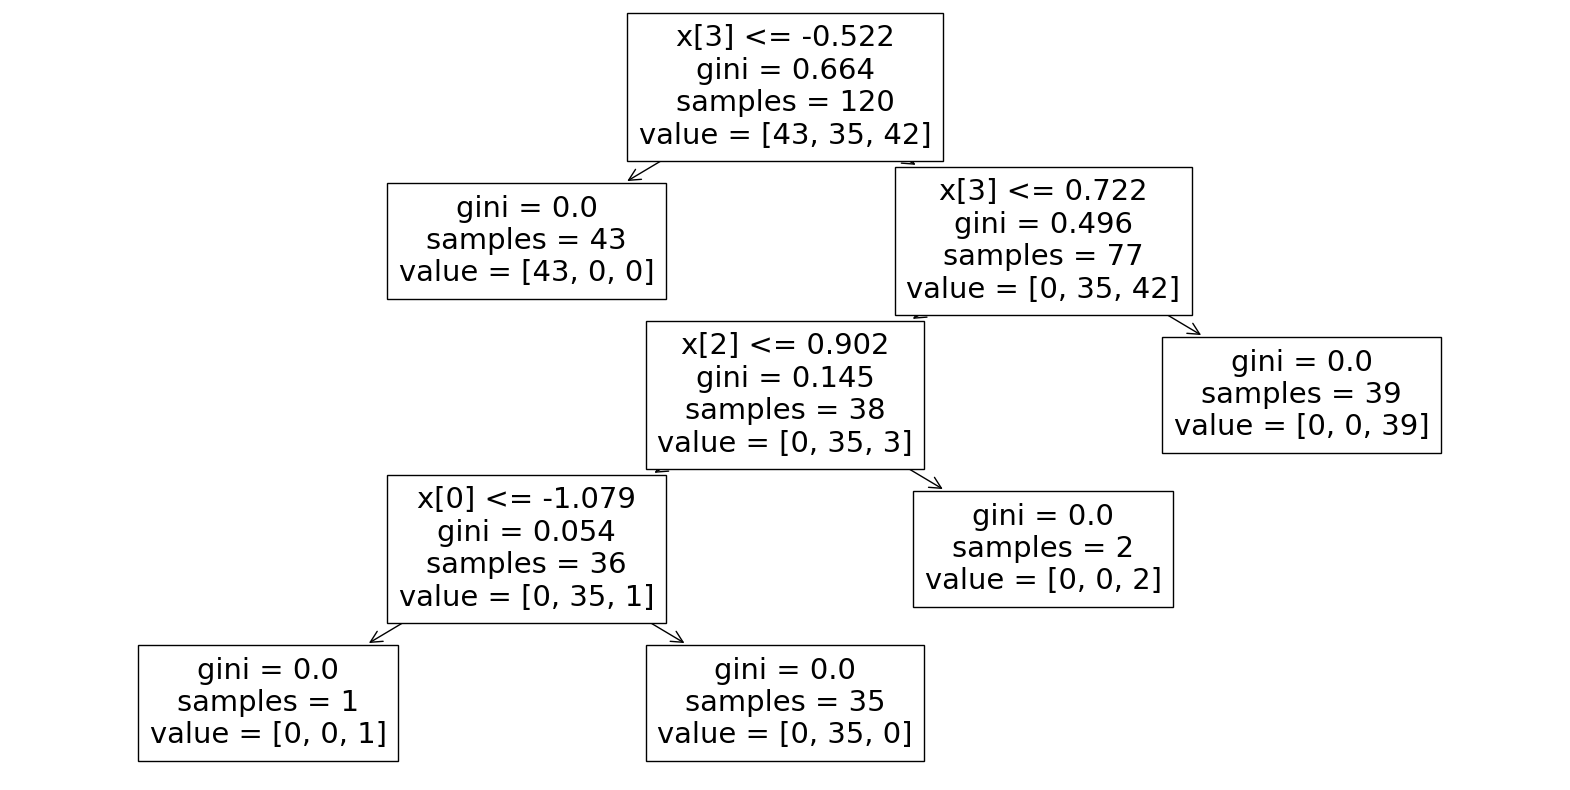

In [50]:
# plot the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_clf)
plt.show()


[[ 7  0  0]
 [ 0 13  2]
 [ 0  2  6]]


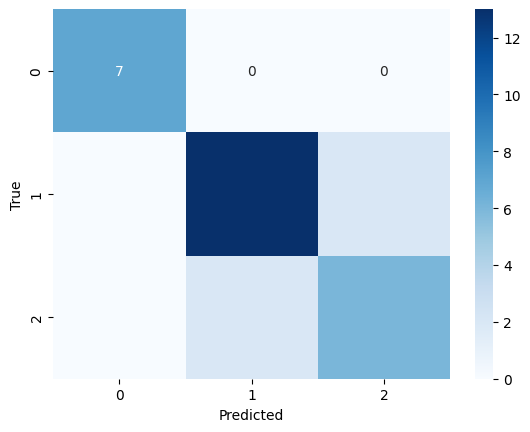

In [51]:
# draw the table of the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(conf_mat)

# draw the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
